In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

keras.__version__

'3.6.0'

In [2]:
tf.__version__

'2.18.0'

# Load and process IMDB data for text classification

In [3]:
from keras.datasets import imdb

#Download IMDB data and split into train and test sets
(X_train, y_train), (X_test, y_test) = imdb.load_data()

This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative).

In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [5]:
from keras.preprocessing.sequence import pad_sequences

# Some hyperparameters
vocab_size = 10000  # Number of unique words to consider
max_len = 100  # Maximum length of each review (padding/truncation)

# Filter out-of-vocabulary indices
def filter_out_of_vocab_indices(data, vocab_size):
    return [[min(word, vocab_size - 1) for word in review] for review in data]

X_train = filter_out_of_vocab_indices(X_train, vocab_size)
X_test = filter_out_of_vocab_indices(X_test, vocab_size)

# Pad sequences to ensure uniform input size
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

class_names = ["Negative", "Positive"]

#### Print some IMDB examples

In [6]:
print(X_train[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670 9999    9
   35  480  284    5  150    4  172  112  167 9999  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18 9999    5   62  386   12    8  316    8  106    5    4 2223
 5244   16]


In [7]:
print(y_train[0], class_names[y_train[0]])

1 Positive


# Use Keras to build a recurrent neural network for text classification

#### Construct all the layers in the recurrent neural network

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([                        
    keras.layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len),   # Embedding layer  
    keras.layers.SimpleRNN(64, dropout=0.3, activation="relu"),                    #RNN layer, hidden vector size 64
    keras.layers.Dense(1, activation="sigmoid")                       #Output layer, binary classification with 1 neuron and sigmoid
])

In [10]:
model.layers

[<Embedding name=embedding_1, built=False>,
 <SimpleRNN name=simple_rnn_1, built=False>,
 <Dense name=dense_1, built=False>]

#### Set up some hyperparameters: use cross entropy loss, min-batch gradient descent, adam optimizer, and print out accruacy during training

In [11]:
model.compile(loss="binary_crossentropy",                #Cross entropy loss function
              optimizer="Adam",                          #Adam optimizer
              metrics=["accuracy"])                      #Using accuracy

#### Train the model: use 10 epochs, and display training loss, training accuracy, validation loss, and validation accuracy during model training

In [12]:
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5047 - loss: 0.6929 - val_accuracy: 0.5728 - val_loss: 0.6845
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6228 - loss: 0.6549 - val_accuracy: 0.7670 - val_loss: 0.5291
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8035 - loss: 0.4407 - val_accuracy: 0.8210 - val_loss: 0.4116
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8688 - loss: 0.3366 - val_accuracy: 0.7676 - val_loss: 0.5244
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8827 - loss: 0.3200 - val_accuracy: 0.8254 - val_loss: 0.4860
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9080 - loss: 0.2405 - val_accuracy: 0.8328 - val_loss: 0.4246
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9189 - loss: 0.2190 - val_accuracy: 0.8162 - val_loss: 0.4511
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9283 - loss: 0.1949 - val_accuracy: 0.

#### Plot the training results

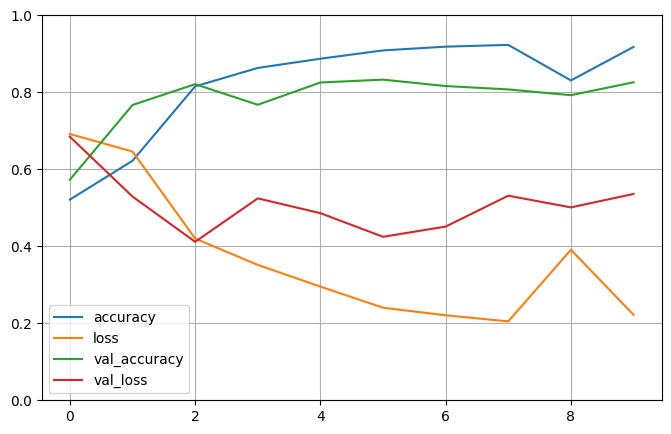

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluate the trained Recurrent neural network

#### Evaluate the train recurrent neural network using model.evaluation()

Here, we can use model.evaluation() directly to get the loss and accuracy on the test data. This will return two results, where the first one is test loss and the second one is the test accuracy.

In [14]:
model.evaluate(X_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7946 - loss: 0.6130


[0.6117568612098694, 0.7961599826812744]

#### Evaluate the train recurrent neural network using accuracy and F1-score

In [15]:
y_proba = model.predict(X_test)
y_proba.round(2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.02],
       [0.72],
       [0.89],
       ...,
       [0.01],
       [0.01],
       [0.34]], dtype=float32)

Prediction labels:

In [16]:
y_pred = (y_proba > 0.5).astype("int32")
y_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

#### Output the confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[10160  2340]
 [ 2756  9744]]


#### Calculate accuracy, macro F1-score, and micro F1-score

In [18]:
from sklearn.metrics import accuracy_score, f1_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
microf1 = f1_score(y_test, y_pred, average='micro')
print('Accuracy: {:.2f}'.format(acc))
print('F1-score: {:.2f}'.format(f1))

Accuracy: 0.80
F1-score: 0.79
